In [1]:
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D,MaxPooling1D
from keras.layers import Dropout

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';')

<ipython-input-3-2125bc70cce7>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';')


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.isnull().values.any()

True

In [3]:
## Data can be downloaded from: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

<ipython-input-3-64c3fb22162e>:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
<ipython-input-3-64c3fb22162e>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
<ipython-input-3-64c3fb22162e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',


1- Note that data include 'nan' and '?' as a string. I converted both to "numpy nan" in importing stage (above) and treated both of them the same.

2- I merged two columns 'Date' and 'Time' to 'dt'.

3- I also converted in the above, the data to time-series type, by taking index to be the time.

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
df.dtypes

,0
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [7]:
df.shape

(2075259, 7)

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

#Dealing with missing values 'nan' with a test statistic

In [10]:
# finding all columns that have nan:
droping_list_all=[]
for j in range(0,7):
    if df.iloc[:, j].isnull().any():
        droping_list_all.append(j)
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [11]:
# filling nan with mean in any columns
for j in droping_list_all:
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [12]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


#Data visualization

Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar structure.

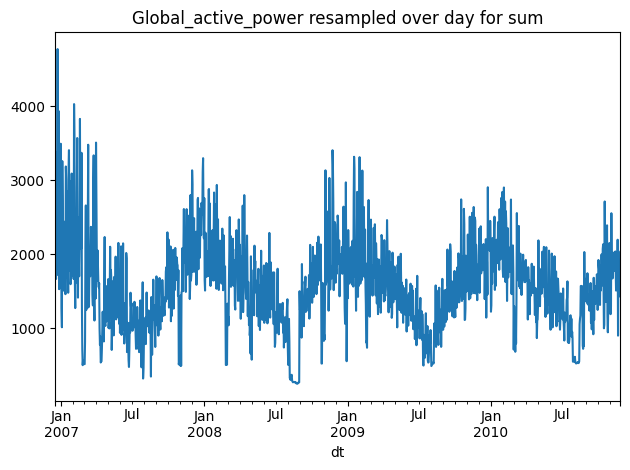

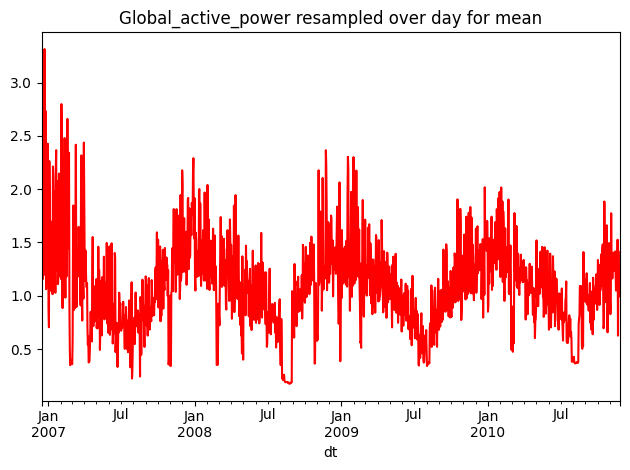

In [ ]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red')
plt.tight_layout()
plt.show()

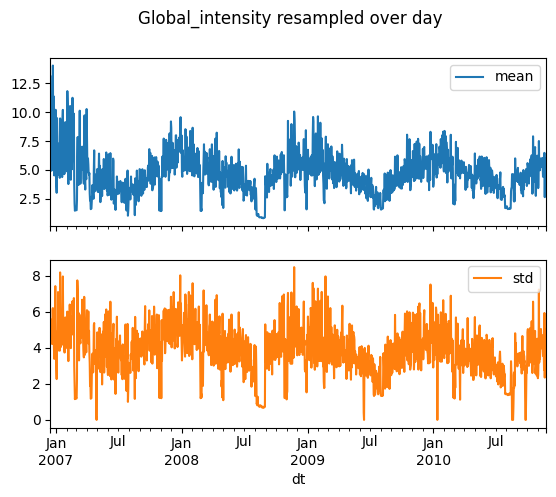

In [ ]:
### Below I show mean and std of 'Global_intensity' resampled over day
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

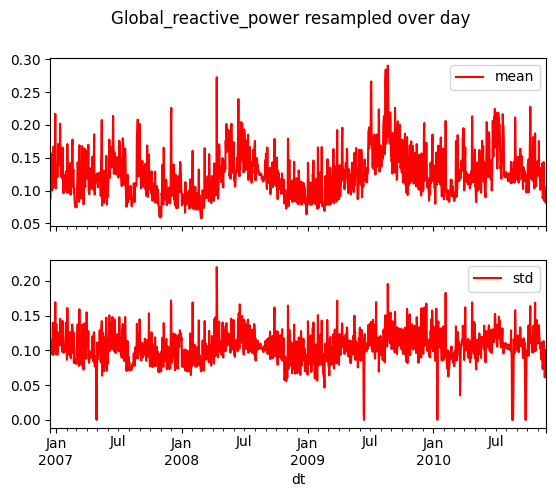

In [ ]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

<ipython-input-19-9634fd98a7d7>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Global_active_power'].resample('M').mean().plot(kind='bar')


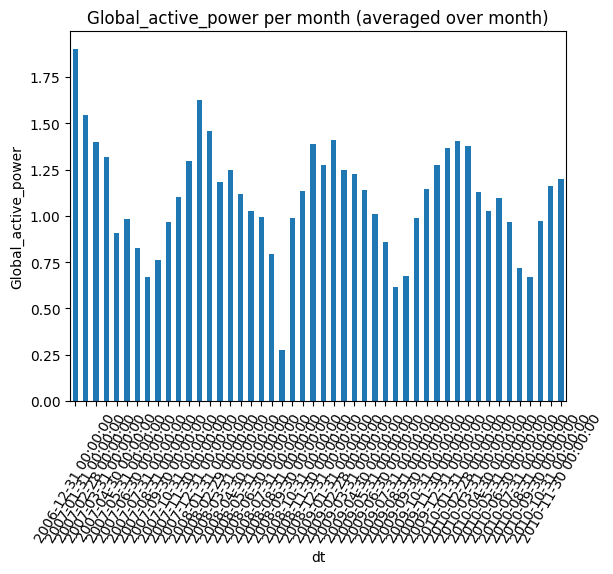

In [ ]:
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

<ipython-input-20-6a1b3dc2b158>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df['Global_active_power'].resample('Q').mean().plot(kind='bar')


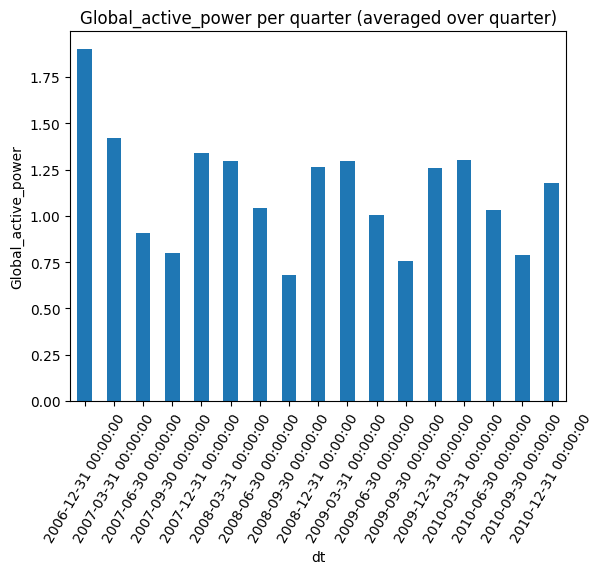

In [ ]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering.

<ipython-input-21-7cd4ff9d71b8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Voltage'].resample('M').mean().plot(kind='bar', color='red')


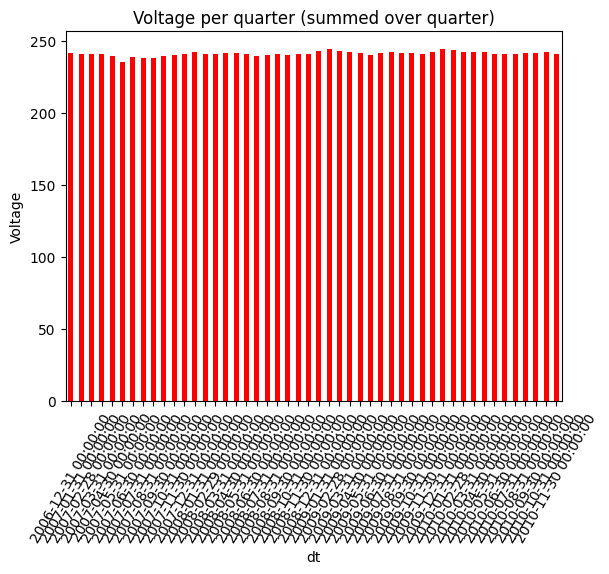

In [ ]:
# mean of 'Voltage' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

<ipython-input-22-7ed25db45c7c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')


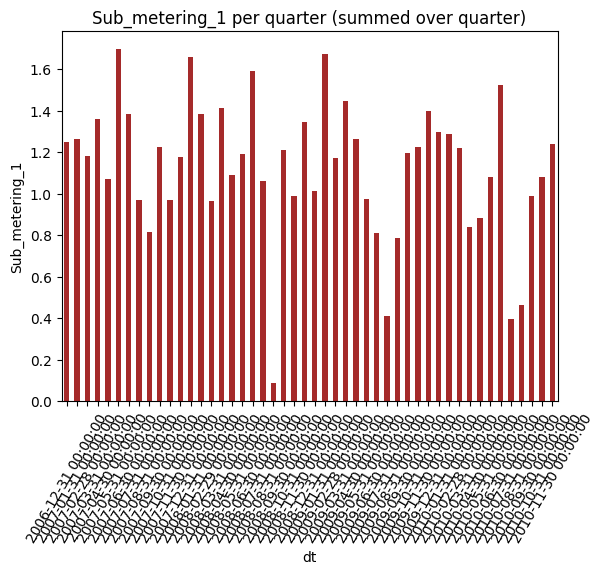

In [ ]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

<ipython-input-23-a3fd90334bfa>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Sub_metering_2'].resample('M').mean().plot(kind='bar', color='green')


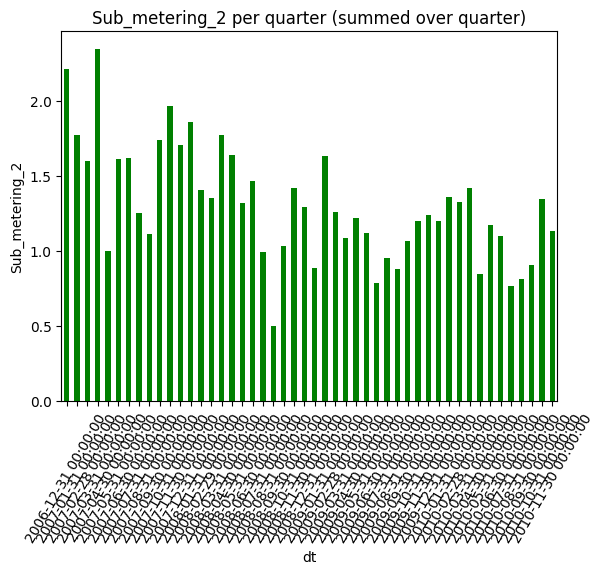

In [ ]:
df['Sub_metering_2'].resample('M').mean().plot(kind='bar', color='green')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 per quarter (summed over quarter)')
plt.show()

It is seen from the above plots that the mean of 'Voltage' over month is pretty much constant compared to other features. This is important again in feature selection.

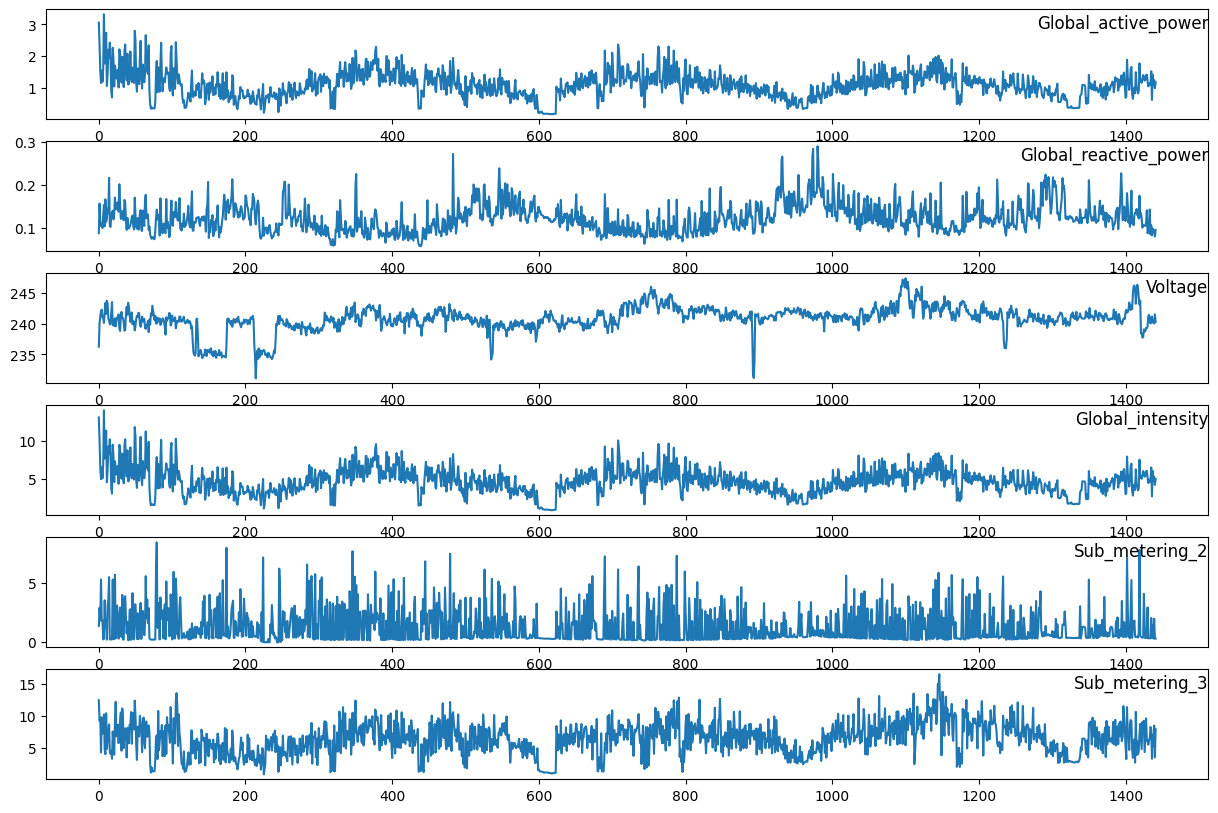

In [ ]:
# Below I compare the mean of different features resampled over day.
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

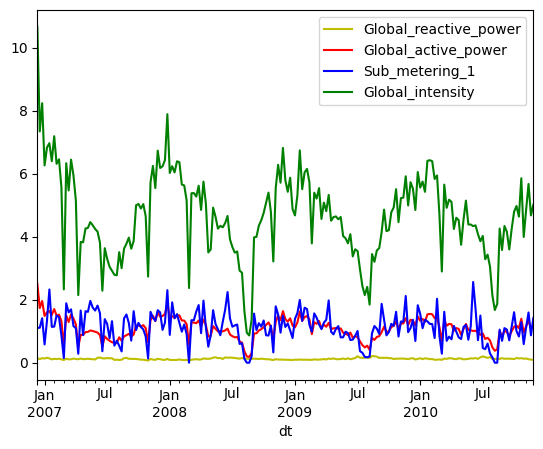

In [ ]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

<ipython-input-26-e0f3b0bcd48d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
<ipython-input-26-e0f3b0bcd48d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
<ipython-input-26-e0f3b0bcd48d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
<ipython-input-26-e0f3b0bcd48d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)


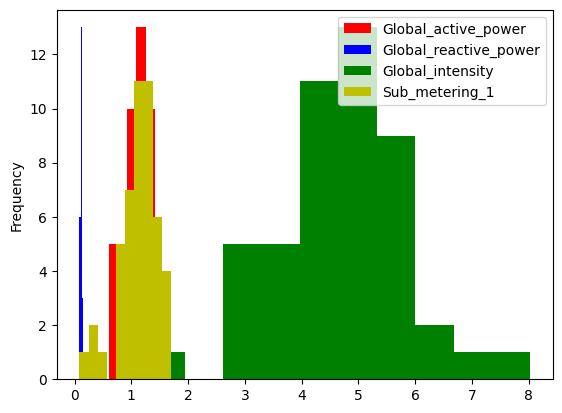

In [ ]:
# Below I show hist plot of the mean of different feature resampled over month
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

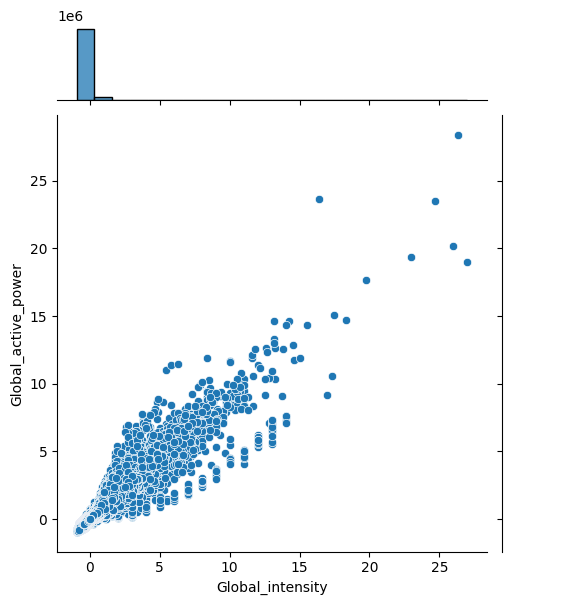

In [ ]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)

plt.show()

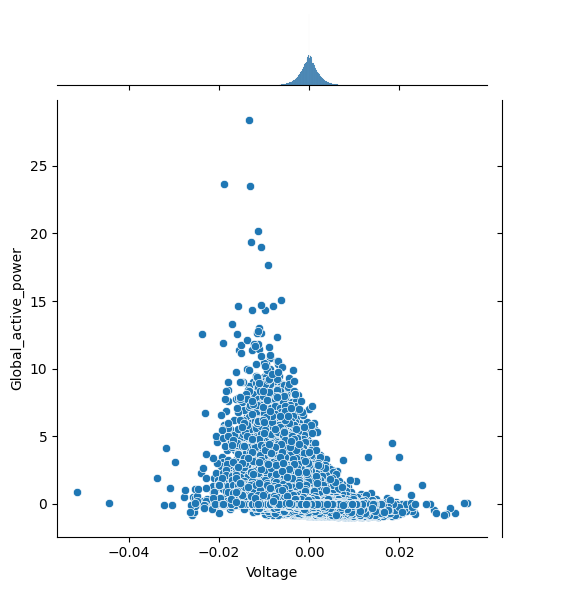

In [ ]:
## The correlations between 'Voltage' and  'Global_active_power'
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)
plt.show()

From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.

#Correlations among features

<Figure size 800x800 with 0 Axes>

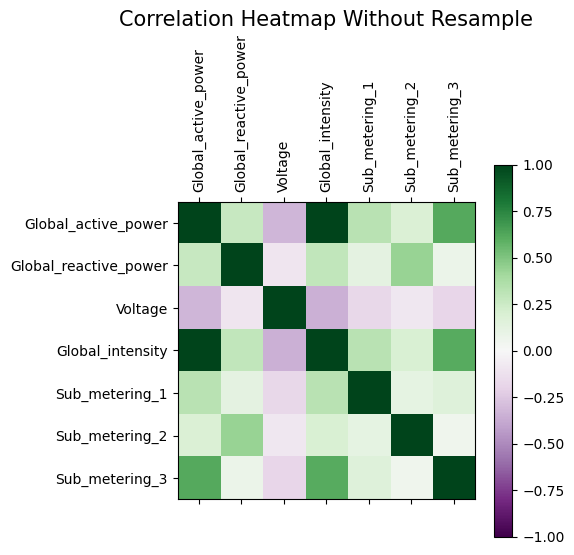

In [ ]:
# Correlations among columns
correlation_matrix = df.corr(method='spearman')
plt.figure(figsize=(8, 8))
plt.matshow(correlation_matrix, vmax=1, vmin=-1, cmap='PRGn')
plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation Heatmap Without Resample', size=15)
plt.show()

<ipython-input-28-b141e9c8e6dd>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
<ipython-input-28-b141e9c8e6dd>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')


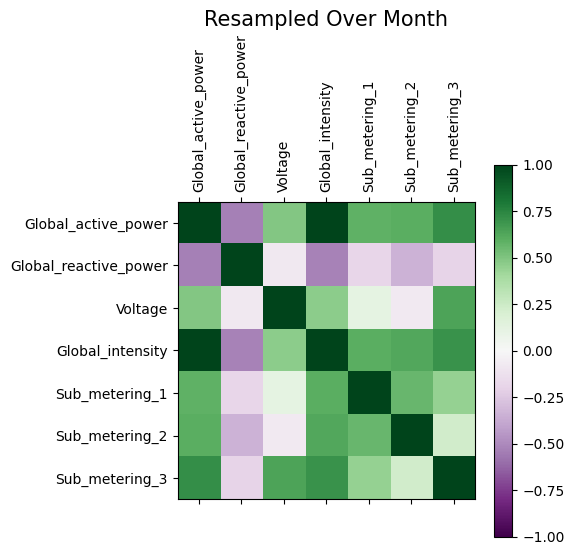

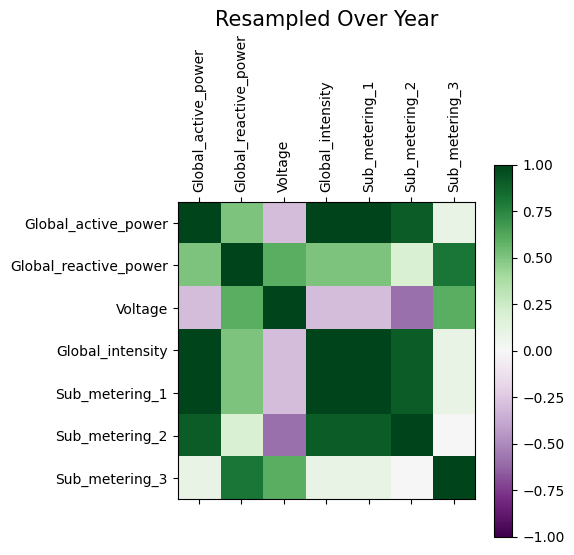

In [ ]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Resampled Over Month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Resampled Over Year', size=15)
plt.colorbar()
plt.show()

* It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature engineering.

#Machine-Leaning: LSTM Data Preparation and feature engineering

* I will apply recurrent neural network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.¶
* I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

* In order to reduce the computation time, and also get a quick result to test the model. One can resample the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.

In [ ]:
## resampling of data over hour
df_resample = df.resample('h').mean()
df_resample.shape

(34589, 7)

In [ ]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


* Above I showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current time in hour (depending on resampling).

Splitting the rest of data to train and validation sets:

 First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [ ]:
# fit network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100)                 │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,301 (169.14 KB)

 Trainable params: 43,301 (169.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
126/126 - 3s - 27ms/step - loss: 0.0201 - val_loss: 0.0123
Epoch 2/20
126/126 - 4s - 35ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 3/20


KeyboardInterrupt: 

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test RMSE: 0.614


In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'inv_y' is not defined

#LSTM + CNN Model

In [ ]:
df_resample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


In [ ]:
import numpy as np

# Assuming your dataset is a Pandas DataFrame `df`
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_resample.values)

# Convert the data into sequences
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i-timesteps:i, :])
        y.append(data[i, 0])  # Assuming the target is the first column
    return np.array(X), np.array(y)

timesteps = 12  # e.g., using the past 24 hours to predict the next hour
X, y = create_sequences(scaled_data, timesteps)

# Split into train/test sets
split = int(len(X) * 0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
X.shape

(34577, 12, 7)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0173 - val_loss: 0.0086
Epoch 2/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0105 - val_loss: 0.0079
Epoch 3/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - loss: 0.0098 - val_loss: 0.0076
Epoch 4/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 5/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0094 - val_loss: 0.0073
Epoch 6/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 7/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 8/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0087 - val_loss: 0.0072
Epoch 9/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0089 - val_loss: 0.0071
Epoch 10/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 0.0088 - val_loss: 0.0070
Epoch 11/40
379/379 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 12/40
379/379 ━━━━━━━━━━━━━━━━

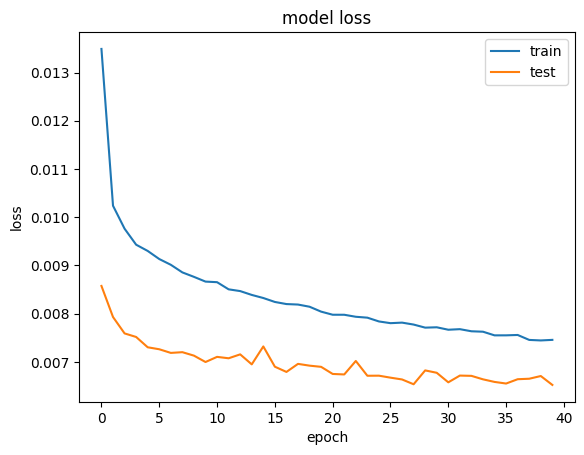

325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071
Test Loss: 0.006522222422063351


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential()

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# LSTM Layer
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=128, validation_data=(X_test, y_test))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


In [ ]:
predictions.shape

(6913, 1)

In [ ]:
y_test.shape

(6913,)

325/325 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0071
Test Loss (MSE): 0.006522222422063351
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


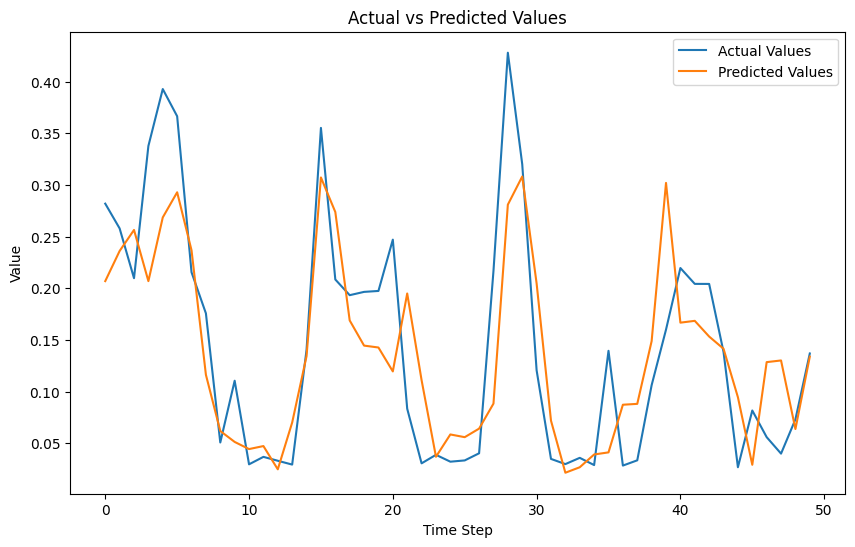

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions if you scaled your data
# predictions_rescaled = scaler.inverse_transform(predictions)
# y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions vs the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:200], label='Actual Values')
plt.plot(predictions[:200], label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
